# **Step4b -> "Reducción de dimensiones"**

##wd

In [1]:
working_dir = "../data"
working_dir

'../data'

In [2]:
import pandas as pd

## Archivo de datos: **datos_post_step4a.csv**


In [3]:
# Cargamos los datos transformados del Step 4a
df = pd.read_csv(f"{working_dir}/datos_post_step4a.csv")
# Aplicamos las transformaciones básicas 
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
print(df.shape)
df.head()

(244103, 106)


,valor_adquisicion_pen,valor_referencial_2025_pen,anios_desde_inscripcion,base_imponible,valor_adquisicion_log,valor_referencial_log,base_imponible_log,valor_adquisicion_scaled,valor_referencial_scaled,base_imponible_scaled,...,marca_agrupada_MERCEDES BENZ,marca_agrupada_MG,marca_agrupada_MITSUBISHI,marca_agrupada_NISSAN,marca_agrupada_OTROS,marca_agrupada_SUBARU,marca_agrupada_SUZUKI,marca_agrupada_TOYOTA,marca_agrupada_VOLKSWAGEN,marca_agrupada_VOLVO
0,149323.8,126060,3,149323.8,11.913879,11.744521,11.913879,0.780557,0.808453,0.770073,...,False,False,False,False,False,False,False,False,False,False
1,52462.5,48930,1,52462.5,10.867873,10.798166,10.867873,-0.619207,-0.543770,-0.668268,...,False,False,False,False,False,False,False,False,False,False
2,158062.8,136190,2,158062.8,11.970754,11.821814,11.970754,0.856667,0.918894,0.848280,...,False,False,False,False,True,False,False,False,False,False
3,58068.2,40850,3,58068.2,10.969391,10.617687,10.969391,-0.483356,-0.801653,-0.528673,...,False,False,False,False,False,False,False,False,False,False
4,58217.6,64070,2,64070.0,10.971960,11.067747,11.067747,-0.479917,-0.158573,-0.393425,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.dtypes

valor_adquisicion_pen         float64
valor_referencial_2025_pen      int64
anios_desde_inscripcion         int64
base_imponible                float64
valor_adquisicion_log         float64
                               ...   
marca_agrupada_SUBARU            bool
marca_agrupada_SUZUKI            bool
marca_agrupada_TOYOTA            bool
marca_agrupada_VOLKSWAGEN        bool
marca_agrupada_VOLVO             bool
Length: 106, dtype: object

In [5]:
df.drop(columns=['base_imponible', 'valor_adquisicion_pen', 'valor_referencial_2025_pen'], inplace=True)

## Analizamos la correlación entre Variables Numéricas

In [6]:
df.columns

Index(['anios_desde_inscripcion', 'valor_adquisicion_log',
       'valor_referencial_log', 'base_imponible_log',
       'valor_adquisicion_scaled', 'valor_referencial_scaled',
       'base_imponible_scaled', 'propiedad_100%', 'propiedad_<100%',
       'tipo_persona_juridica',
       ...
       'marca_agrupada_MERCEDES BENZ', 'marca_agrupada_MG',
       'marca_agrupada_MITSUBISHI', 'marca_agrupada_NISSAN',
       'marca_agrupada_OTROS', 'marca_agrupada_SUBARU',
       'marca_agrupada_SUZUKI', 'marca_agrupada_TOYOTA',
       'marca_agrupada_VOLKSWAGEN', 'marca_agrupada_VOLVO'],
      dtype='object', length=103)

In [7]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.values
numerical

array(['anios_desde_inscripcion', 'valor_adquisicion_log',
       'valor_referencial_log', 'base_imponible_log',
       'valor_adquisicion_scaled', 'valor_referencial_scaled',
       'base_imponible_scaled'], dtype=object)

In [8]:
categorical = df.select_dtypes(include=['object']).columns.values
categorical

array([], dtype=object)

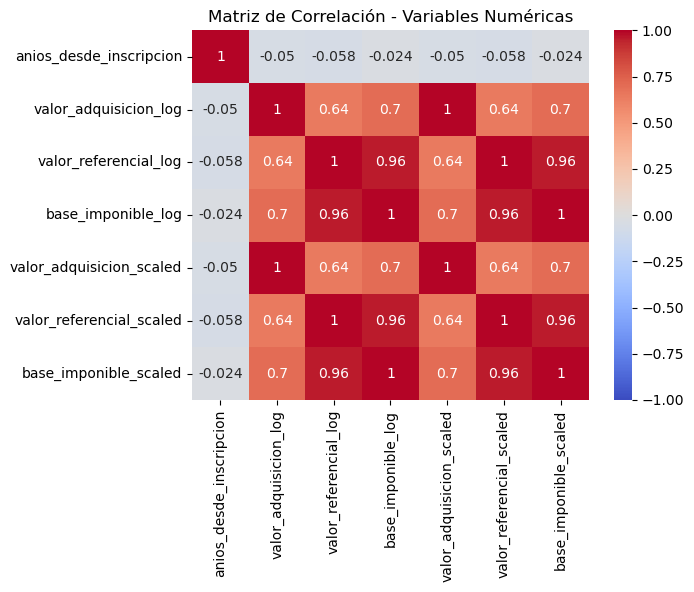

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df[numerical].corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

In [10]:
df.drop(columns=['base_imponible_log', 'valor_adquisicion_log', 'valor_referencial_log'], inplace=True)

In [11]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.values
numerical

array(['anios_desde_inscripcion', 'valor_adquisicion_scaled',
       'valor_referencial_scaled', 'base_imponible_scaled'], dtype=object)

In [12]:
df[numerical].head(5)

,anios_desde_inscripcion,valor_adquisicion_scaled,valor_referencial_scaled,base_imponible_scaled
0,3,0.780557,0.808453,0.770073
1,1,-0.619207,-0.543770,-0.668268
2,2,0.856667,0.918894,0.848280
3,3,-0.483356,-0.801653,-0.528673
4,2,-0.479917,-0.158573,-0.393425


## Reducimos la dimensionalidad con PCA

In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
# Test de Bartlett para evaluar si es recomendable aplicar PCA
try:
    from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
    
    # H0: Todas las correlaciones son cero  -> No se observa correlación entre las variables
    # Ha: Al menos una de las correlaciones es diferente de cero
    
    chi_square_value, p_value = calculate_bartlett_sphericity(df[numerical])
    print(f"Test de Bartlett - p-value: {p_value}")
    
    if p_value <= 0.05:
        print("✓ Se recomienda aplicar PCA (p-value <= 0.05)")
    else:
        print("✗ No se recomienda aplicar PCA (p-value > 0.05)")
        
except ImportError:
    print("Nota: factor_analyzer no disponible, continuamos con PCA")
    p_value = 0.001  # Asumimos que es recomendable

Nota: factor_analyzer no disponible, continuamos con PCA


In [15]:
# PCA
from sklearn.decomposition import PCA

# Definir X como las variables numéricas
X = df[numerical]
numerical_pca = numerical  # Lista de variables numéricas

pca = PCA()
datos_pca_array = pca.fit_transform(X)

# Convertimos a DataFrame
datos_pca = pd.DataFrame(datos_pca_array, columns=[f'PC{i+1}' for i in range(len(numerical_pca))])
datos_pca

,PC1,PC2,PC3,PC4
0,1.088618,1.047647,-0.164519,-0.076925
1,-1.206239,-1.044236,0.297578,-0.048802
2,1.268563,0.054411,-0.236542,-0.072317
3,-1.224823,0.958742,0.511973,0.166181
4,-0.825177,-0.027313,0.067194,-0.153205
...,...,...,...,...
244098,-0.660149,-1.020660,0.002905,-0.128063
244099,0.321354,-0.982043,-0.231749,-0.156260
244100,1.102340,1.050815,-0.035953,0.124269
244101,0.085479,1.008191,0.083338,-0.041022


In [16]:
pca_loadings = pca.components_
pca_loadings

array([[-0.03442693,  0.7376608 ,  0.46035896,  0.49268748],
       [ 0.99871514,  0.00796074,  0.00930272,  0.04917475],
       [ 0.02379133,  0.67327638, -0.5558118 , -0.48703813],
       [-0.02858022, -0.04992082, -0.69213895,  0.71946838]])

In [17]:
X.shape

(244103, 4)

In [18]:
loadings_df = pd.DataFrame(
    pca_loadings,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=numerical
)
loadings_df

,PC1,PC2,PC3,PC4
anios_desde_inscripcion,-0.034427,0.737661,0.460359,0.492687
valor_adquisicion_scaled,0.998715,0.007961,0.009303,0.049175
valor_referencial_scaled,0.023791,0.673276,-0.555812,-0.487038
base_imponible_scaled,-0.028580,-0.049921,-0.692139,0.719468


In [19]:
pca_scores = pca.transform(X)
pca_scores

array([[ 1.08861834,  1.04764712, -0.16451912, -0.07692506],
       [-1.20623872, -1.04423569,  0.29757835, -0.04880174],
       [ 1.26856306,  0.05441111, -0.23654196, -0.07231712],
       ...,
       [ 1.1023399 ,  1.05081499, -0.03595271,  0.12426926],
       [ 0.08547866,  1.00819067,  0.08333811, -0.04102171],
       [ 0.41601376,  0.01910668, -0.11481987, -0.1777215 ]],
      shape=(244103, 4))

In [20]:
datos_pca = pd.DataFrame(
    pca_scores, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],  # solo las PCs existentes
    index=df.index
)
datos_pca

,PC1,PC2,PC3,PC4
0,1.088618,1.047647,-0.164519,-0.076925
1,-1.206239,-1.044236,0.297578,-0.048802
2,1.268563,0.054411,-0.236542,-0.072317
3,-1.224823,0.958742,0.511973,0.166181
4,-0.825177,-0.027313,0.067194,-0.153205
...,...,...,...,...
251812,-0.660149,-1.020660,0.002905,-0.128063
251813,0.321354,-0.982043,-0.231749,-0.156260
251814,1.102340,1.050815,-0.035953,0.124269
251815,0.085479,1.008191,0.083338,-0.041022


In [21]:
explained_variance = pca.explained_variance_

print('Varianza explicada por PC:')
print(explained_variance)
print(np.round(explained_variance, 1))

Varianza explicada por PC:
[2.44276106 0.64002229 0.46965981 0.02780252]
[2.4 0.6 0.5 0. ]


In [22]:
PVE = pca.explained_variance_ratio_
PVE_acum = np.cumsum(pca.explained_variance_ratio_)

print('Proporción de varianza explicada por PC:')
print(PVE)
print('Proporción acumulada de varianza explicada por PC:')
print(PVE_acum)

Proporción de varianza explicada por PC:
[0.68228867 0.17876491 0.13118089 0.00776553]
Proporción acumulada de varianza explicada por PC:
[0.68228867 0.86105358 0.99223447 1.        ]


Text(0.5, 1.0, 'Gráfico de sedimentación')

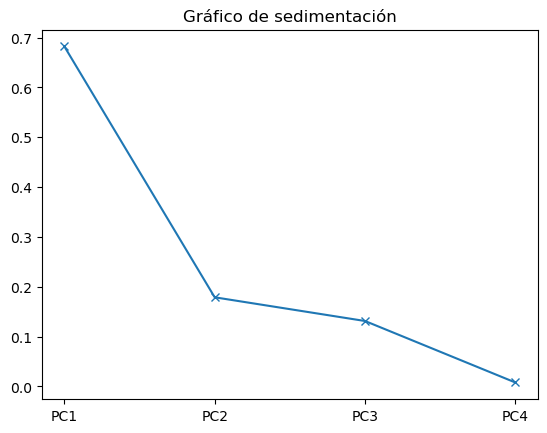

In [23]:
plt.plot(['PC1', 'PC2', 'PC3', 'PC4'], PVE , marker='x' )
plt.title('Gráfico de sedimentación')

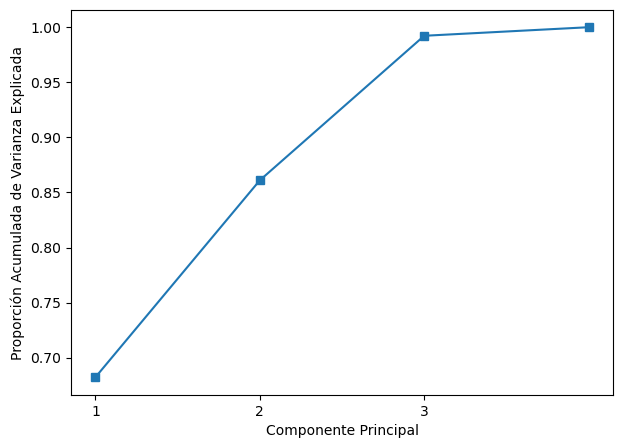

In [24]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], PVE_acum, '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xticks([1,2,3])
plt.show()

In [25]:
import plotly.express as px

px.area(
    x=range(1, PVE_acum.shape[0] + 1),
    y=PVE_acum,
    labels={"x": "# Components", "y": "Explained Variance"}
)

ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Proporción de varianza explicada por cada componente
PVE = pca.explained_variance_ratio_
print("Proporción de Varianza Explicada por componente:")
for i, var in enumerate(PVE):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

Proporción de Varianza Explicada por componente:
PC1: 0.6823 (68.23%)
PC2: 0.1788 (17.88%)
PC3: 0.1312 (13.12%)
PC4: 0.0078 (0.78%)


## Guardamos los datos con reducción dimensional

In [26]:
print(datos_pca.shape)
datos_pca

(244103, 4)


,PC1,PC2,PC3,PC4
0,1.088618,1.047647,-0.164519,-0.076925
1,-1.206239,-1.044236,0.297578,-0.048802
2,1.268563,0.054411,-0.236542,-0.072317
3,-1.224823,0.958742,0.511973,0.166181
4,-0.825177,-0.027313,0.067194,-0.153205
...,...,...,...,...
251812,-0.660149,-1.020660,0.002905,-0.128063
251813,0.321354,-0.982043,-0.231749,-0.156260
251814,1.102340,1.050815,-0.035953,0.124269
251815,0.085479,1.008191,0.083338,-0.041022


In [27]:
print(df.shape)
df

(244103, 100)


,anios_desde_inscripcion,valor_adquisicion_scaled,valor_referencial_scaled,base_imponible_scaled,propiedad_100%,propiedad_<100%,tipo_persona_juridica,tipo_persona_menores_edad,tipo_persona_natural,tipo_persona_soc_conyugal,...,marca_agrupada_MERCEDES BENZ,marca_agrupada_MG,marca_agrupada_MITSUBISHI,marca_agrupada_NISSAN,marca_agrupada_OTROS,marca_agrupada_SUBARU,marca_agrupada_SUZUKI,marca_agrupada_TOYOTA,marca_agrupada_VOLKSWAGEN,marca_agrupada_VOLVO
0,3,0.780557,0.808453,0.770073,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,-0.619207,-0.543770,-0.668268,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2,0.856667,0.918894,0.848280,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
3,3,-0.483356,-0.801653,-0.528673,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2,-0.479917,-0.158573,-0.393425,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251812,1,-0.410630,-0.073511,-0.311566,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
251813,1,0.157114,0.528632,0.267907,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
251814,3,0.867221,0.604086,0.859125,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
251815,3,0.205350,0.183669,0.179013,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [28]:
numerical

array(['anios_desde_inscripcion', 'valor_adquisicion_scaled',
       'valor_referencial_scaled', 'base_imponible_scaled'], dtype=object)

In [29]:
datos_reducPCA = pd.concat([df.drop(numerical, axis=1), datos_pca.drop(['PC4'], axis=1)], axis=1)
print(datos_reducPCA.shape)
datos_reducPCA.head(3)

(244103, 99)


,propiedad_100%,propiedad_<100%,tipo_persona_juridica,tipo_persona_menores_edad,tipo_persona_natural,tipo_persona_soc_conyugal,tipo_persona_soc_irregular,tipo_persona_suc_indivisa,tipo_contribuyente_grande,tipo_contribuyente_mediano,...,marca_agrupada_NISSAN,marca_agrupada_OTROS,marca_agrupada_SUBARU,marca_agrupada_SUZUKI,marca_agrupada_TOYOTA,marca_agrupada_VOLKSWAGEN,marca_agrupada_VOLVO,PC1,PC2,PC3
0,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,1.088618,1.047647,-0.164519
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,-1.206239,-1.044236,0.297578
2,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,1.268563,0.054411,-0.236542


In [32]:
datos_reducPCA.to_csv(f'{working_dir}/datos_post_Step4b.csv', index=False, sep=',', encoding='utf-8')